In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.tools

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:

diamonds = pd.read_csv("https://resources.digitalfutures.com/data-science/diamonds.csv")

In [8]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds =pd.get_dummies(diamonds, columns=['cut','color','clarity'],prefix = ['cut','color','clarity'], drop_first= True)

In [10]:
diamonds

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [11]:
diamonds.corr()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.034196,-0.163660,0.116245,...,0.102465,0.161494,0.180054,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.136114,-0.022778,-0.198306,...,0.026037,0.022630,0.022543,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.175174,-0.549599,0.338072,...,0.011574,0.017967,0.037253,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.000312,-0.097175,0.095706,...,0.059223,0.097125,0.081710,-0.049596,0.008957,0.128420,-0.009886,-0.001062,-0.095266,-0.052381
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.030349,-0.162674,0.126820,...,0.095896,0.146522,0.164658,-0.125976,0.079241,0.270827,-0.059882,-0.035507,-0.185253,-0.147151
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.032187,-0.153158,0.107943,...,0.093480,0.142895,0.160776,-0.120800,0.076097,0.263252,-0.056490,-0.035928,-0.179271,-0.141624
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.045169,-0.158688,0.090019,...,0.095041,0.145276,0.164217,-0.125248,0.081005,0.263192,-0.058513,-0.036314,-0.182401,-0.144746
cut_Good,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,1.000000,-0.258018,-0.185385,...,-0.009517,0.006187,0.014977,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627
cut_Ideal,-0.163660,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688,-0.258018,1.000000,-0.478074,...,-0.021264,-0.009225,-0.038490,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508
cut_Premium,0.116245,-0.198306,0.338072,0.095706,0.126820,0.107943,0.090019,-0.185385,-0.478074,1.000000,...,0.027895,0.005899,0.017231,-0.054013,0.023275,0.067623,-0.011866,0.022611,-0.053852,-0.061949


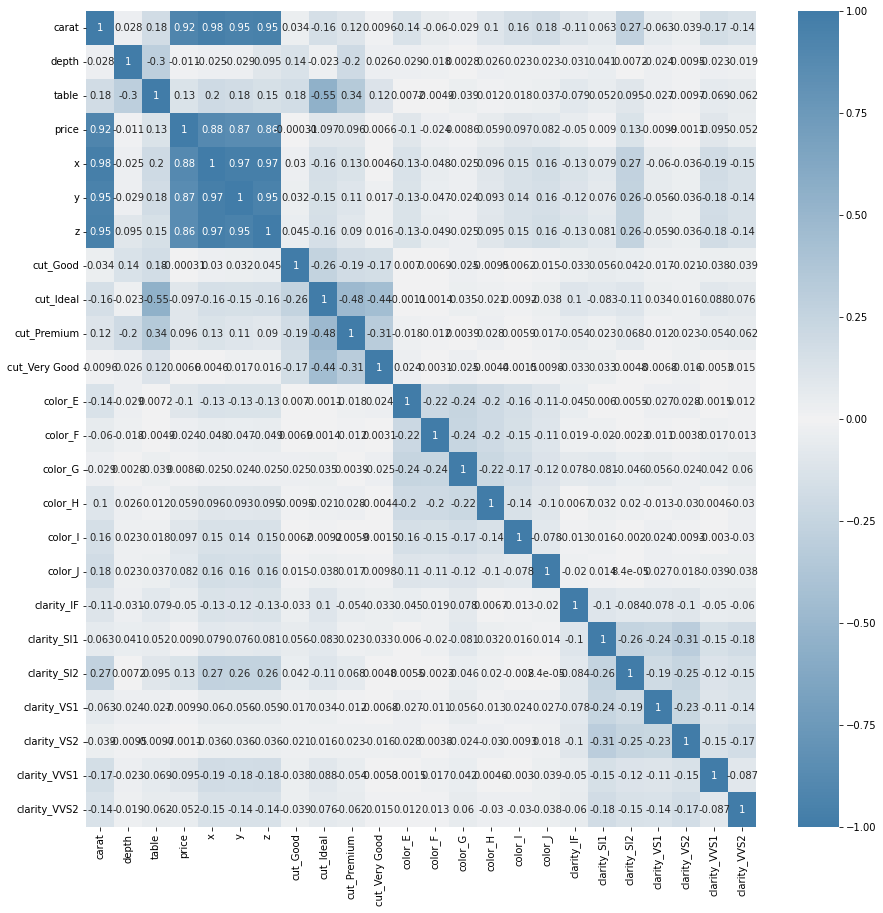

In [12]:
plt.figure(figsize = (15, 15))
sns.heatmap(diamonds.corr(),
            annot = True,
            vmin = -1,
            center = 0,
            cmap = sns.diverging_palette(600,600, as_cmap=True)
            )
plt.show()

In [13]:
# linear regression
def calc_lin(df, feature_cols, yname):
    X = df[feature_cols]
    y = df[yname]
    linreg = LinearRegression()
    linreg.fit(X,y)

    coeff = list(zip(feature_cols,linreg.coef_))
    intercept = linreg.intercept_
    df['y_pred'] = linreg.predict(X)

    print(f'The intercept is {intercept}')
    print(f'The slop is {coeff}')

    rmse = statsmodels.tools.eval_measures.rmse(y, diamonds['y_pred'])

    return linreg, rmse


In [ ]:
#feature_cols = [['carat', 'clarity' ]]
calc_diamonds = calc_lin(diamonds,['carat'], ['price'])
calc_diamonds

The intercept is [-2256.36058005]
The slop is [('carat', array([7756.42561797]))]


In [ ]:
rmse = statsmodels.tools.eval_measures.rmse(y, diamonds['y_pred'])
rmse